In [1]:
import pandas as pd
import xarray as xr
from pathlib import Path

from ffc.utils import netcdf_to_bag_of_words

CMIP5_PATH = Path('data/raw/cmip5/')

[nltk_data] Downloading package punkt to /home/lhs18285/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/lhs18285/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /home/lhs18285/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/lhs18285/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


In [2]:
paths = list(CMIP5_PATH.glob('**/*.nc'))
print('Number of files', len(paths))

Number of files 0


In [17]:
paths[0]

PosixPath('data/raw/cmip5/badc/cmip5/data/cmip5/output1/MOHC/HadCM3/decadal2000/mon/aerosol/aero/r1i3p1/v20110825/dryso2/dryso2_aero_HadCM3_decadal2000_r1i3p1_200011-201011.nc')

In [18]:
ds = xr.open_dataset(paths[0])
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 73, lon: 96, time: 121)
Coordinates:
  * time       (time) object 2000-11-16 00:00:00 ... 2010-11-16 00:00:00
  * lat        (lat) float64 -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    dryso2     (time, lat, lon) float32 ...
Attributes:
    institution:            Met Office Hadley Centre, Fitzroy Road, Exeter, D...
    institute_id:           MOHC
    experiment_id:          decadal2000
    source:                 HadCM3 - Hadley Centre Coupled Model Version 3 (2...
    model_id:               HadCM3
    forcing:                GHG, Oz, SA, Sl, Vl, (GHG = CO2, N2O, CH4, CFCs)
    parent_experiment_id:   N/A
    parent_experiment_rip:  N/A
    branch_time:            0.0
    contact:                doug.smith@metoffice.gov.uk, holger.pohlmann@meto...
    history:                MOHC pp to CMOR/NetCDF convertor (version 1.10.0)...
    references:             Collins, M. S.F.B Tett, and C. Cooper (2001) the ...
    initialization_method:  3
    physics_version:        1
    tracking_id:            d27c0c50-3d73-4907-9258-8027727e1cb3
    mo_runid:               ajzvk
    product:                output
    experiment:             10- or 30-year run initialized in year 2000
    frequency:              mon
    creation_date:          2011-08-10T09:26:04Z
    Conventions:            CF-1.4
    project_id:             CMIP5
    table_id:               Table aero (27 April 2011) 10c8207daaf67434c6a62c...
    title:                  HadCM3 model output prepared for CMIP5 10- or 30-...
    parent_experiment:      N/A
    modeling_realm:         aerosol
    realization:            1
    cmor_version:           2.7.1

In [25]:
import json
attrs = ds.attrs
for k, v in attrs.items():
    if not isinstance(v, str):
        attrs[k] = int(v)

with open('cmip5_example.json', 'w') as handle:
    json.dump(attrs, handle)

In [4]:
freqs = [netcdf_to_bag_of_words(p) for p in paths]

In [5]:
df = pd.DataFrame(freqs).fillna(0)
df

,met,office,hadley,centre,fitzroy,road,exeter,devon,ex1,3pb,...,299,2012-07-07t03:01:29z,583b00f5,393e,43e7,af36,3ddc0ff47191,210144,283,2012-07-07t03:01:44z
0,1.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
332,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
333,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
334,0.0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
X = transformer.fit_transform(df)

In [7]:
X

<336x1084 sparse matrix of type '<class 'numpy.float64'>'
	with 44040 stored elements in Compressed Sparse Row format>

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
embed = tsne.fit_transform(X)

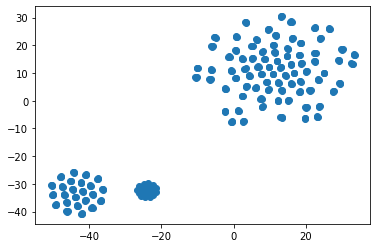

In [9]:
import matplotlib.pyplot as plt
plt.scatter(*embed.T)

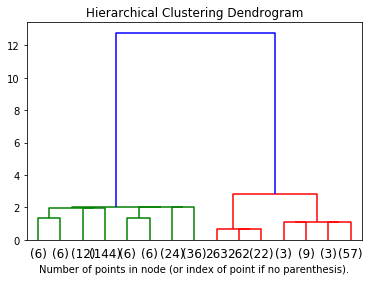

In [10]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

ac = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
ac.fit_predict(X.toarray())
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(ac, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [11]:
ac = AgglomerativeClustering(n_clusters=3)
idx = ac.fit_predict(X.toarray())

hadcm3    0.215387
year      0.201630
hadley    0.161540
centre    0.161540
2000      0.161540
dtype: float64
national    0.282375
cesm        0.225900
ncar        0.169425
2006        0.169425
2012        0.169425
dtype: float64
national    0.266447
cesm        0.213158
28          0.170935
2012        0.159868
2006        0.159868
dtype: float64


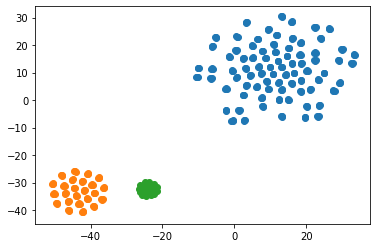

In [12]:
for label in np.unique(idx):
#     subset = df.loc[idx == label]
    plt.scatter(*embed[idx == label].T)
    cluster = pd.DataFrame(X.toarray()[idx==label], columns=df.columns)
    print(cluster.mean().sort_values(ascending=False).iloc[:5])
#     print(df.loc[idx == label].mean().sort_values(ascending=False))

In [13]:
cluster_a.mean()

NameError: name 'cluster_a' is not defined

In [ ]:
diff = (cluster_b.mean() - cluster_a.mean()).sort_values()
fig, ax = plt.subplots(figsize=(20,20))
diff.loc[diff.abs() > 2].plot(kind='barh', ax=ax)